## <center> <u> Machine-Learning - Assignment 3 </u> </center>
### <u> Group Members </u>
#### Mazaharuddin Mohammad
#### Vamshi Krishna Sunkari
#### KaranKumar Jayeshbhai Patel

### Apply the CART algorithm to Golf dataset below to find the missing value?

### <center> <u>Installing and Importing Libraries </u> </center>

In [1]:
!pip install graphviz
!pip install pydotplus

In [2]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus
import graphviz

### Reading Train .Csv file

In [3]:
golf_df = pd.read_csv('Golf.csv')

In [4]:
golf_df.head(15)

,Day,Outlook,Humidity,Wind,Play
0,D1,Sunny,High,Weak,No
1,D2,Sunny,High,Strong,No
2,D3,OverCast,High,Weak,Yes
3,D4,Rain,High,Weak,Yes
4,D5,Rain,Normal,Weak,Yes
5,D6,Rain,Normal,Strong,No
6,D7,OverCast,Normal,Strong,Yes
7,D8,Sunny,High,Weak,No
8,D9,Sunny,Normal,Weak,Yes
9,D10,Rain,Normal,Weak,Yes


In [5]:
testing_Predictors = ['Outlook','Humidity','Wind']
testing_output = ['Play']

### Creating dummy variables for categorical variables

In [6]:
# Defining the predictors
X = pd.get_dummies(golf_df[testing_Predictors], drop_first=True)
y = golf_df[testing_output]

In [7]:
X.head(10)

,Outlook_Rain,Outlook_Sunny,Humidity_Normal,Wind_Weak
0,0,1,0,1
1,0,1,0,0
2,0,0,0,1
3,1,0,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,0,1,0,1
8,0,1,1,1
9,1,0,1,1


In [8]:
y.head(10)

,Play
0,No
1,No
2,Yes
3,Yes
4,Yes
5,No
6,Yes
7,No
8,Yes
9,Yes


### Splitting the data into train and test

In [9]:
#Splitting the data into training and valid data - 60/40%
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [11]:
# Train Decision Tree Classifer
clf = clf.fit(train_X,train_y)

### Terminal Nodes

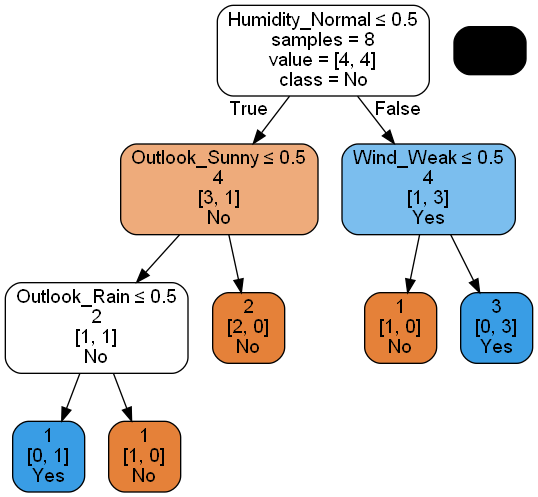

In [12]:
#Plotting the decision tree
plotDecisionTree(clf, feature_names=X.columns, class_names=clf.classes_)

In [13]:
#Predict the response for test dataset
y_pred = clf.predict(valid_X)

In [15]:
valid_X

,Outlook_Rain,Outlook_Sunny,Humidity_Normal,Wind_Weak
3,1,0,0,1
7,0,1,0,1
6,0,0,1,0
2,0,0,0,1
10,0,1,1,0
4,1,0,1,1


In [16]:
y_pred

array(['No', 'No', 'No', 'Yes', 'No', 'Yes'], dtype=object)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(valid_y, y_pred))

Accuracy: 0.5


### Reading Test .Csv file

In [21]:
Test = pd.read_csv('Golf_test.csv')

In [22]:
Test.head()

,Outlook,Humidity,Wind
0,Sunny,Normal,Weak


In [23]:
dummy1 = ['Outlook','Humidity','Wind']

In [25]:
# Defining the predictors
X1 = pd.get_dummies(Test[dummy1])
y2 = golf_df.Play

In [26]:
X1.insert(0, "Outlook_rain",0)

In [27]:
X1

,Outlook_rain,Outlook_Sunny,Humidity_Normal,Wind_Weak
0,0,1,1,1


In [28]:
y1_pred = clf.predict(X1)

### Predicting the missing value

In [29]:
y1_pred

array(['Yes'], dtype=object)